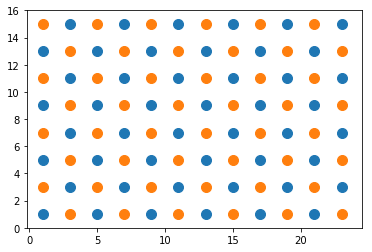

In [1]:
import numpy as np
import numpy as np, scipy.linalg as la
import matplotlib.pyplot as plt

%matplotlib inline

def generate_structure_2d(pos_uc,latvec,nx,ny):
    # diatomic cell
    # number of basis
    nb = pos_uc.shape[0]
    natm = nb * nx * ny
    
    # the atom positions of supercell
    pos = np.zeros((natm,3))
    count = 0
    for i in range(nx):
        for j in range(ny):
            for k in range(nb):
                pos[count,0:2] = pos_uc[k,0:2] + i * latvec[0,:] + j * latvec[1,:]
                pos[count,2] = pos_uc[k,2]
                count += 1
    return pos

def plot_structure(pos,m):
    npos = len(pos)
    nm = len(m)
    
    for i in range(npos):
        for j in range(nm):
            if (abs(float(m[j])-pos[i,2])<0.001):
                plt.scatter(pos[i,0],pos[i,1],c='C'+str(j),s=100)
    
    plt.axis('equal')
    
# obtain the index of neighboring atoms for a atom
def gen_neighbor_list(pos,nns,latvec_sc):
    npos = len(pos)
    dr = np.zeros((2,))
    
    # neighborlist with dimensions (natm, number of neighbors)
    nlist = np.zeros((npos,nns))
    for i in range(npos):
        count = 0
        for j in range(npos):
            for m in range(-1,2):
                for n in range(-1,2):
                    dr = pos[i,0:2]-pos[j,0:2] +\
                    m* latvec_sc[0,:] + \
                    n* latvec_sc[1,:]
                    if abs(np.sqrt(np.dot(dr,dr))-a)<0.0001:
                        nlist[i,count] = j
                        count += 1
                    elif abs(np.sqrt(np.dot(dr,dr))-np.sqrt(2)*a)<0.0001:
                        nlist[i,count] = j
                        count += 1
    return nlist

    
    

# position and mass of basis (x,y,m)
a = 2 # bond length in ang
mlist = [2,3] # mass in 1e-26 kg

nx = 6
ny = 4

pos_uc = np.array([[0.5*a, 0.5*a, mlist[0]],
                   [1.5*a, 0.5*a, mlist[1]],
                   [0.5*a, 1.5*a, mlist[1]],
                   [1.5*a, 1.5*a, mlist[0]]])

nb = len(pos_uc)
natm = nb * nx * ny

latvec = np.array([[2*a,0],[0,2*a]])
                

latvec_sc = np.array([latvec[0,:]*nx,latvec[1,:]*ny])
pos = generate_structure_2d(pos_uc,latvec,nx,ny)
plot_structure(pos,mlist)

# find the neighbor list for each atom
nlist = gen_neighbor_list(pos,8,latvec_sc)
    
    
    
    
    

Text(7.2,7.2,'d')

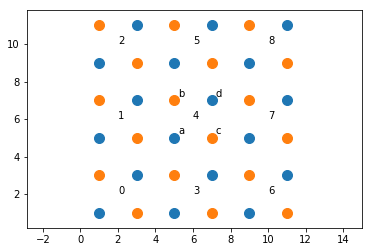

In [2]:
plot_structure(generate_structure_2d(pos_uc,latvec,3,3),mlist)

count = 0
for i in range(-1,2):
    for j in range(-1,2):
        plt.text((2*i+3)*a, (2*j+3)*a, str(count))
        count += 1
plt.text((2.6)*a, (2.6)*a,'a')
plt.text((2.6)*a, (3.6)*a,'b')
plt.text((3.6)*a, (2.6)*a,'c')
plt.text((3.6)*a, (3.6)*a,'d')

The potential writes,
\begin{equation}
V = V_0 + \frac{1}{2!}\sum_{ij}\Phi_{ij}u_i u_j +\frac{1}{3!}\sum_{ijk}\Phi_{ijk}u_i u_j u_k+...
\end{equation}
where $\Phi_{ij}$ is the harmonic force constant.
For diatomic square lattice, we consider nearest neighbor interaction and second-nearest neighbor interaction. 
We want to compute the force constant involved with atom 4a. First, we express the potential explicitly,
\begin{align}
V = &\frac{1}{2}k_1(u_{1c,x}-u_{4a,x})^2+\frac{1}{2}k_1(u_{3b,y}-u_{4a,y})^2+\frac{1}{2}k_1(u_{4c,x}-u_{4a,x})^2+\frac{1}{2}k_1(u_{4b,y}-u_{4a,y})^2\\ % left bottom right top
&+\frac{1}{2}k_2(-\frac{\sqrt{2}}{2}u_{0d,x}-\frac{\sqrt{2}}{2}u_{0d,y}+\frac{\sqrt{2}}{2}u_{4a,x}+\frac{\sqrt{2}}{2}u_{4a,y})^2\\
&+\frac{1}{2}k_2(\frac{\sqrt{2}}{2}u_{3d,x}-\frac{\sqrt{2}}{2}u_{3d,y}-\frac{\sqrt{2}}{2}u_{4a,x}+\frac{\sqrt{2}}{2}u_{4a,y})^2\\
&+\frac{1}{2}k_2(\frac{\sqrt{2}}{2}u_{4d,x}+\frac{\sqrt{2}}{2}u_{4d,y}-\frac{\sqrt{2}}{2}u_{4a,x}-\frac{\sqrt{2}}{2}u_{4a,y})^2\\
&+\frac{1}{2}k_2(-\frac{\sqrt{2}}{2}u_{1d,x}+\frac{\sqrt{2}}{2}u_{1d,y}+\frac{\sqrt{2}}{2}u_{4a,x}-\frac{\sqrt{2}}{2}u_{4a,y})^2\\
&+\frac{1}{2}k_1(u_{4a,x}-u_{4c,x})^2+\frac{1}{2}k_1(u_{3d,y}-u_{4c,y})^2+\frac{1}{2}k_1(u_{7a,x}-u_{4c,x})^2+\frac{1}{2}k_1(u_{4d,y}-u_{4c,y})^2\\ % second atom
&+\frac{1}{2}k_2(-\frac{\sqrt{2}}{2}u_{3b,x}-\frac{\sqrt{2}}{2}u_{3b,y}+\frac{\sqrt{2}}{2}u_{4c,x}+\frac{\sqrt{2}}{2}u_{4c,y})^2\\
&+\frac{1}{2}k_2(\frac{\sqrt{2}}{2}u_{6b,x}-\frac{\sqrt{2}}{2}u_{6b,y}-\frac{\sqrt{2}}{2}u_{4c,x}+\frac{\sqrt{2}}{2}u_{4c,y})^2\\
&+\frac{1}{2}k_2(\frac{\sqrt{2}}{2}u_{7b,x}+\frac{\sqrt{2}}{2}u_{7b,y}-\frac{\sqrt{2}}{2}u_{4c,x}-\frac{\sqrt{2}}{2}u_{4c,y})^2\\
&+\frac{1}{2}k_2(-\frac{\sqrt{2}}{2}u_{4b,x}+\frac{\sqrt{2}}{2}u_{4b,y}+\frac{\sqrt{2}}{2}u_{4c,x}-\frac{\sqrt{2}}{2}u_{4c,y})^2\\
&...
\end{align}
Element in Hessian matrix,
\begin{align}
&\Phi^{x,x}_{1c,4a} = -k_1 \;(\mathrm{west})\\
&\Phi^{y,y}_{3b,4a} = -k_1 \;(\mathrm{south})\\
&\Phi^{x,x}_{4c,4a} = -k_1 \;(\mathrm{east})\\
&\Phi^{y,y}_{4b,4a} = -k_1 \;(\mathrm{north})\\
\\
&\Phi^{x,y}_{1c,4a} = \Phi^{y,x}_{1c,4a} =\Phi^{x,y}_{4a,1c} = \Phi^{y,x}_{4a,1c} = 0 \;(\mathrm{west})\\
&\Phi^{x,y}_{3b,4a} = \Phi^{y,x}_{3b,4a} = \Phi^{x,y}_{4a,3b} = \Phi^{y,x}_{4a,3b} = 0 \;(\mathrm{south})\\
&\Phi^{x,y}_{4c,4a} = \Phi^{y,x}_{4c,4a} = \Phi^{x,y}_{4a,4c} = \Phi^{y,x}_{4a,4c} = 0 \;(\mathrm{east})\\
&\Phi^{x,y}_{4b,4a}  = \Phi^{y,x}_{4b,4a} = \Phi^{x,y}_{4a,4b}  = \Phi^{y,x}_{4a,4b} = 0 \;(\mathrm{north})\\
\\
&\Phi^{x,x}_{4a,0d} = \Phi^{x,x}_{0d,4a} = -\frac{k_2}{2} \;(\mathrm{south west})\\
&\Phi^{x,y}_{4a,0d} = \Phi^{y,x}_{0d,4a} = -\frac{k_2}{2} \;(\mathrm{south west})\\
&\Phi^{y,x}_{4a,0d} = \Phi^{x,y}_{0d,4a} = -\frac{k_2}{2} \;(\mathrm{south west})\\
&\Phi^{y,y}_{4a,0d} = \Phi^{y,y}_{0d,4a} = -\frac{k_2}{2} \;(\mathrm{south west})\\
\\
&\Phi^{x,x}_{4a,3d} = \Phi^{x,x}_{3d,4a} = -\frac{k_2}{2} \;(\mathrm{south east})\\
&\Phi^{x,y}_{4a,3d} = \Phi^{y,x}_{3d,4a} = +\frac{k_2}{2} \;(\mathrm{south east})\\
&\Phi^{y,x}_{4a,3d} = \Phi^{x,y}_{3d,4a} = +\frac{k_2}{2} \;(\mathrm{south east})\\
&\Phi^{y,y}_{4a,3d} = \Phi^{y,y}_{3d,4a} = -\frac{k_2}{2} \;(\mathrm{south east})\\
\\
&\Phi^{x,x}_{4a,4d} = \Phi^{x,x}_{4d,4a} = -\frac{k_2}{2} \;(\mathrm{north east})\\
&\Phi^{x,y}_{4a,4d} = \Phi^{y,x}_{4d,4a} = -\frac{k_2}{2} \;(\mathrm{north east})\\
&\Phi^{y,x}_{4a,4d} = \Phi^{x,y}_{4d,4a} = -\frac{k_2}{2} \;(\mathrm{north east})\\
&\Phi^{y,y}_{4a,4d} = \Phi^{y,y}_{4d,4a} = -\frac{k_2}{2} \;(\mathrm{north east})\\
\\
&\Phi^{x,x}_{4a,1d} = \Phi^{x,x}_{1d,4a} = -\frac{k_2}{2} \;(\mathrm{north west})\\
&\Phi^{x,y}_{4a,1d} = \Phi^{y,x}_{1d,4a} = +\frac{k_2}{2} \;(\mathrm{north west})\\
&\Phi^{y,x}_{4a,1d} = \Phi^{x,y}_{1d,4a} = +\frac{k_2}{2} \;(\mathrm{north west})\\
&\Phi^{y,y}_{4a,1d} = \Phi^{y,y}_{1d,4a} = -\frac{k_2}{2} \;(\mathrm{north west})\\
\end{align}



In [3]:
# The generic_functions.py file must exist in the same directory
from generic_functions import *
def gen_force_constant_supercell(pos,latvec_sc):
    npos = len(pos)
    pos_fc = np.zeros((npos*(2+1)*(2+1),3))
    
    count = 0
    for i in range(-1,2):
        for j in range(-1,2):
            for n in range(npos):
                pos_fc[count,0:2] = pos[n,0:2] \
                   + float(i)*latvec_sc[0,:]\
                   + float(j)*latvec_sc[1,:]
                pos_fc[count,2] = pos[n,2]
                count += 1
    return pos_fc

 
def get_force_constant(pos,pos_fc,a):
    
    k1 = 100 # nereast neighbor force constant
    k2 = 50 # second nearest neighbor force constant
    
    # number of atoms in unit cell
    nuc = len(pos)
    nsc = len(pos_fc)
    force_constant = np.zeros((nuc*2,natm*2*(2+1)*(2+1)))
    
    istart = int(1 * (3*nuc) + 1*nuc)
    dr = np.zeros((2,))
    
    for i in range(nuc):
        for j in range(nsc):
            dr = pos_fc[j,0:2] - pos_fc[i+istart,0:2]
            ix = 0 # x
            iy = 0 # x 
            if abs(np.sqrt(np.dot(dr,dr))-a)<0.0001\
                 and abs(dr[1])<0.001:
                force_constant[2*i+ix,2*j+iy] = -k1
            elif abs(np.sqrt(np.dot(dr,dr))-np.sqrt(2)*a)<0.0001:
                force_constant[2*i+ix,2*j+iy] = -k2/2
            ix = 1 # y
            iy = 1 # y 
            if abs(np.sqrt(np.dot(dr,dr))-a)<0.0001\
                 and abs(dr[0])<0.001:
                force_constant[2*i+ix,2*j+iy] = -k1
            elif abs(np.sqrt(np.dot(dr,dr))-np.sqrt(2)*a)<0.0001:
                force_constant[2*i+ix,2*j+iy] = -k2/2
            ix = 0 # x
            iy = 1 # y
            if abs(np.sqrt(np.dot(dr,dr))-np.sqrt(2)*a)<0.0001 \
               and abs(dr[0]+dr[1])<0.001: # north west and south east
                force_constant[2*i+ix,2*j+iy] =  k2/2
            elif abs(np.sqrt(np.dot(dr,dr))-np.sqrt(2)*a)<0.0001 \
               and abs(dr[0]-dr[1])<0.001: # south west and north east
                force_constant[2*i+ix,2*j+iy] = -k2/2
            ix = 1 # y
            iy = 0 # x
            if abs(np.sqrt(np.dot(dr,dr))-np.sqrt(2)*a)<0.0001 \
               and abs(dr[0]+dr[1])<0.001: # north west and south east
                force_constant[2*i+ix,2*j+iy] =  k2/2
            elif abs(np.sqrt(np.dot(dr,dr))-np.sqrt(2)*a)<0.0001 \
               and abs(dr[0]-dr[1])<0.001: # south west and north east
                force_constant[2*i+ix,2*j+iy] = -k2/2
    #print(force_constant.shape)
    #fig, axs = plt.subplots(ncols=1,figsize=(16,16))
    #matshow(axs,force_constant,title='$fc$')
    
    # acoustic sum rule
    for i in range(nuc):
        for ix in range(2):
            for iy in range(2):
                force_constant[2*i+ix,2*(istart+i)+iy] = force_constant[2*i+ix,2*(istart+i)+iy]-np.sum(force_constant[2*i+ix,iy::2])
    return force_constant
    
# calculate the dynamical matrix
def gen_dyn(force_constant,pos,pos_fc,q):
    npos = len(pos)
    nd = 2*npos
    dyn = np.zeros((nd,nd),dtype=complex)
    nuc = len(pos)
    nsc = len(pos_fc)
    # central unit celll
    istart = int(1 * (3*nuc) + 1*nuc)

    for i in range(nuc):
        for j in range(nsc):
            for ix in range(2):
                for iy in range(2):
                    dyn[2*i+ix,2*np.mod(j,nuc)+iy] += \
                    force_constant[2*i+ix,2*j+iy]*\
                    np.exp(1j*(np.dot(q,pos_fc[j,0:2]-pos_fc[istart+np.mod(j,nuc),0:2])))\
                    /np.sqrt(pos[i,2]*pos[np.mod(j,nuc),2])
    #fig, axs = plt.subplots(ncols=1,figsize=(4,4))
    #matshow(axs,dyn.real,title='$fc$')

    dyn = 0.5*(dyn+np.transpose(np.conj(dyn))) # make sure dyn mat is hermitian
    return dyn

def cal_phonon(dyn):
    [w,v] = la.eig(dyn)
    return w

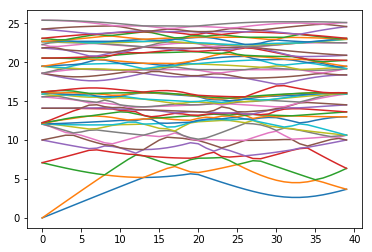

In [4]:



#def cal_dos(dyn):


# we create a 3x3 supercell where central cell is the unit cell of interest
# we calculate dynamical matrix from the force constant
pos_fc = gen_force_constant_supercell(pos,latvec_sc)
#plot_structure(pos_fc,mlist)
    
force_constant = get_force_constant(pos,pos_fc,a)

dyn = gen_dyn(force_constant,pos,pos_fc,np.array([0,0]))


nq = 40
nbranch = natm*2
q = np.linspace(0,np.pi/a/2,nq)
data = np.zeros((nq,nbranch))
for i in range(nq):
    dyn = gen_dyn(force_constant,pos,pos_fc,[q[i],q[i]])
    w = cal_phonon(dyn)/1e-26
    data[i,:] = np.sort(np.real(np.sqrt(w))/2/np.pi/1e12) # in THz
plt.figure()
for i in range(nbranch):
    plt.plot(data[:,i])

            

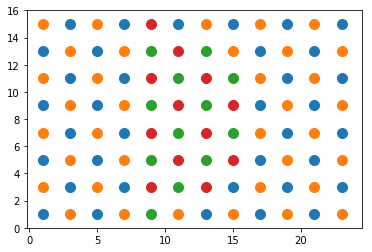

In [4]:
def create_mass_defect(pos):
    npos = len(pos)
    left_b = 8.5
    for i in range(npos):
        x = 0.12*((16/2)**2-(16/2-pos[i,1])**2)
        right_b = left_b+x
        if pos[i,0]>left_b and pos[i,0]<right_b:
            pos[i,2] = 2*pos[i,2]
    return pos

pos = create_mass_defect(pos)

mlist = [2,3,4,6] # mass in 1e-26 kg
plot_structure(pos,mlist)

        

Percent: [##################################################] 99.9901960784%    

Text(0.5,0,'LDOS')

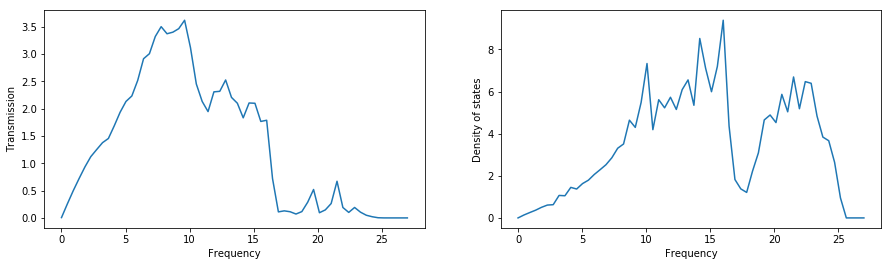

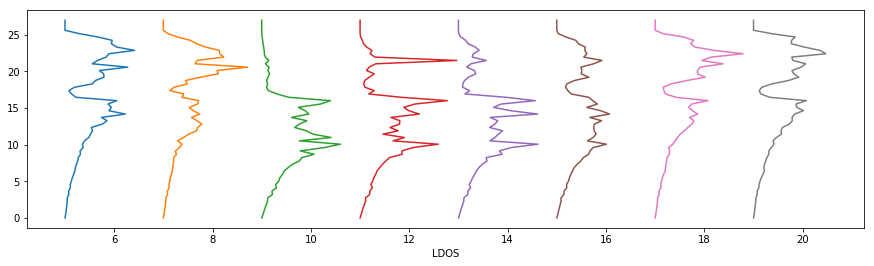

In [72]:
from generic_functions import *
from __future__ import print_function
import time
import sys

def update_progress(progress,bl):
    barLength = bl # Modify this to change the length of the progress bar
    status = ""
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
        status = "error: progress var must be float\r\n"
    if progress < 0:
        progress = 0
        status = "Halt...\r\n"
    if progress >= 1:
        progress = 1
        status = "Done...\r\n"
    block = int(round(barLength*progress))
    text = "\rPercent: [{0}] {1}% {2}".format( "#"*block + "-"*(barLength-block), progress*100, status)
    sys.stdout.write(text)
    sys.stdout.flush()



def gen_dyn_recursive(force_constant,pos,pos_fc,q):
    nd = 2*len(pos)
    dyn = np.zeros((nd,nd),dtype=complex)
    dyn1 = np.zeros((nd,nd),dtype=complex) # overlap
    nuc = len(pos)
    nsc = len(pos_fc)
    # central unit celll
    istart = int(1 * (3*nuc) + 1*nuc)

    for i in range(nuc):
        for j in range(istart-nuc,istart+2*nuc):
            for ix in range(2):
                for iy in range(2):
                    dyn[2*i+ix,2*np.mod(j,nuc)+iy] += \
                    force_constant[2*i+ix,2*j+iy]*\
                    np.exp(1j*(np.dot(q,pos_fc[j,0:2]-pos_fc[istart+np.mod(j,nuc),0:2])))\
                    /np.sqrt(pos[i,2]*pos[np.mod(j,nuc),2])
        for j in range(istart+2*nuc,istart+5*nuc):
            for ix in range(2):
                for iy in range(2):
                    dyn1[2*i+ix,2*np.mod(j,nuc)+iy] += \
                    force_constant[2*i+ix,2*j+iy]*\
                    np.exp(1j*(np.dot(q,pos_fc[j,0:2]-pos_fc[istart+np.mod(j,nuc),0:2])))\
                    /np.sqrt(pos[i,2]*pos[np.mod(j,nuc),2])

    dyn = 0.5*(dyn+np.transpose(np.conj(dyn))) # make sure dyn mat is hermitian
    return dyn,dyn1

def gen_P_matrix(ny,nuc,pd):
    P = np.zeros((ny*nuc,ny*nuc),dtype=complex)
    for i in range(ny):
        for j in range(ny):
            for k in range(nuc):
                P[i*nuc+k,j*nuc+k] = 1/np.sqrt(ny)*np.exp(1j*(2*np.pi/pd*float(j)/ny)*i*pd)
    return P,np.transpose(np.conj(P))
    
def gen_se_full(omega2,force_constant_uc,pos_uc,pos_fc_uc,ny,pd,P,Pinv,side,Hall,Vall):

    nse = len(pos_uc)*2
    se_full = np.zeros((nse*ny,nse*ny),dtype=complex)
    H = np.zeros((Hall.shape[1],Hall.shape[2]),dtype=complex)
    V = np.zeros((Vall.shape[1],Vall.shape[2]),dtype=complex)
 
    for i in range(ny):
        H[:,:] = Hall[i,:,:]
        V[:,:] = Vall[i,:,:]
       
        if side == 'right': 
            se = SE(omega2,H,V)
        elif side == 'left':
            se = SE(omega2,H,np.transpose(np.conj(V)))
        se_full[i*nse:(i+1)*nse,i*nse:(i+1)*nse] = se

    se_full = np.matmul(np.matmul(P,se_full),Pinv) # np.transpose(np.conj(P))
    return se_full

def gen_dyn_full(q,force_constant_uc,pos_uc,pos_fc_uc,ny,pd,P,Pinv):
    nse = len(pos_uc)*2
    dy_full = np.zeros((nse*ny,nse*ny),dtype=complex)
    for i in range(ny):
        H,V = gen_dyn_recursive(force_constant_uc,pos_uc,pos_fc_uc,\
                                [q[0],q[1]+(2*np.pi/pd*float(i)/ny)])

        dy_full[i*nse:(i+1)*nse,i*nse:(i+1)*nse] = H
        
    dy_full = np.matmul(np.matmul(P,dy_full),Pinv)
    return dy_full

def get_GF(dyn_sc,omega2,force_constant_uc,pos_uc,pos_fc_uc,ny,pd,P,Pinv,Hall,Vall):

    se1 = gen_se_full(omega2,force_constant_uc,pos_uc,pos_fc_uc,ny=ny,pd=pd,P=P,Pinv=Pinv,side='left',Hall=Hall,Vall=Vall)
    se2 = gen_se_full(omega2,force_constant_uc,pos_uc,pos_fc_uc,ny=ny,pd=pd,P=P,Pinv=Pinv,side='right',Hall=Hall,Vall=Vall)



    # device dynamical matrix
    dstart = nb*ny*2
    dend = natm*2-nb*ny*2
    ddyn = np.zeros((dend-dstart,dend-dstart),dtype=complex)
    ddyn = dyn_sc[dstart:dend,dstart:dend]# device dynamical matrix
    
    # Green function
    GF = Gf_bloch(omega2,ddyn,2*nb*ny,se1,se2,eta=1.e-7)
    # spectral function
    AF1 = Af(GF,S1=se1,S2=None)
    AF2 = Af(GF,S1=None,S2=se2)
    # transmission
    tf = Trans_bloch(omega2,ddyn,GF,2*nb*ny,se1,se2,eta=1.e-7)
    
    return GF,tf,AF1,AF2


def get_slabs(pos,layer):
    index = np.zeros((len(layer),int(len(pos)/len(layer))),dtype=int)
    for i in range(len(layer)):
        count = 0
        for j in range(len(pos)):
            if abs(layer[i]-pos[j,0])<0.001:
                index[i,count] = j
                count += 1
    return index

        
def get_GF_average(nd,omega2,qlist,index,ny,force_constant_uc,pos_uc,pos_fc_uc,force_constant,pos,pos_fc,pd):
    GF = np.zeros((nd,nd),dtype=complex)
    af1 = np.zeros((nd,nd),dtype=complex)
    af2 = np.zeros((nd,nd),dtype=complex)
    tf = 0.0
    nw = len(omega2)
    A_sum = np.zeros((nw,))
    tf_sum = np.zeros((nw,))
    af1_sum = np.zeros((nw,))
    af2_sum = np.zeros((nw,))
    nlay = len(index)
    nev = index.shape[1]

    n_uc_fc = force_constant_uc.shape[0]
    
    A_loc_sum = np.zeros((nlay,nw))
    af1_loc_sum = np.zeros((nlay,nw))
    af2_loc_sum = np.zeros((nlay,nw))    

    
    H = np.zeros((ny,n_uc_fc,n_uc_fc),dtype=complex)
    V = np.zeros((ny,n_uc_fc,n_uc_fc),dtype=complex)
#    H1 = np.zeros((n_uc_fc,n_uc_fc),dtype=complex)
#    V1 = np.zeros((n_uc_fc,n_uc_fc),dtype=complex)
    
    q  =np.zeros((2,)) # q point
    nq = len(qlist)
    
    toolbar_width = nw*nq




    for iq in range(nq):
        # unit cell dynamical matrix, self energy
        
        q = qlist[iq]
        
        #dyn =  gen_dyn_full(qlist[iq,:],force_constant_uc,pos_uc,pos_fc_uc,ny=ny,pd=2*a,P=P,Pinv=Pinv)
        dyn_sc = gen_dyn(force_constant,pos,pos_fc,np.array([0,q[1]]))
        
        H[:,:,:] = 0.0
        V[:,:,:] = 0.0
        
        for i in range(ny):

            H1,V1 = gen_dyn_recursive(force_constant_uc,pos_uc,pos_fc_uc,\
                                [q[0],q[1]+(2*np.pi/pd*float(i)/ny)])
            H[i,:,:] = H1[:,:]
            V[i,:,:] = V1[:,:]
        #update_progress((iq)/float(nq),40)
        for iw in range(nw):
            #print([str((iq*nw+iw)*100/(nw*nq)),"%"], end='')
            update_progress((iq*nw+iw)/float(toolbar_width),50)


            GF,tf, af1, af2 = get_GF(dyn_sc,omega2[iw],force_constant_uc,pos_uc,pos_fc_uc,ny,pd,P,Pinv,H,V)
            A_sum[iw] += -np.trace(GF).imag / np.pi
            af1_sum[iw] += np.trace(af1).real / np.pi   
            af2_sum[iw] += np.trace(af2).real / np.pi
            
            for il in range(nlay):
                A_loc_sum[il,iw] += -np.sum(GF[index[il,:],index[il,:]]).imag/np.pi
                af1_loc_sum[il,iw] += np.sum(af1[index[il,:],index[il,:]]).real/np.pi
                af2_loc_sum[il,iw] += np.sum(af2[index[il,:],index[il,:]]).real/np.pi            
            tf_sum[iw] += tf
            
    A_sum[:] = A_sum[:]/float(len(qlist))*np.sqrt(omega2[:])
    tf_sum[:] = tf_sum[:]/float(len(qlist))   
    
    for il in range(nlay):
        A_loc_sum[il,:]   =   A_loc_sum[il,:]/float(len(qlist))*np.sqrt(omega2[:])
        af1_loc_sum[il,:] = af1_loc_sum[il,:]/float(len(qlist))*np.sqrt(omega2[:])
        af2_loc_sum[il,:] = af2_loc_sum[il,:]/float(len(qlist))*np.sqrt(omega2[:])



    return A_sum,tf_sum,A_loc_sum,af1_loc_sum,af2_loc_sum    
    
# prepare the force for electrode
pos_fc_uc = gen_force_constant_supercell(pos_uc,latvec)
force_constant_uc = get_force_constant(pos_uc,pos_fc_uc,a)


# supercell dynamical matrix
pos_fc = gen_force_constant_supercell(pos,latvec_sc)
force_constant = get_force_constant(pos,pos_fc,a)
    
#VGF = np.vectorize(get_GF_average,otypes=[float,float,np.ndarray,np.ndarray,np.ndarray],excluded=[0,2,3])

    
    
P,Pinv = gen_P_matrix(ny=ny,nuc=nb*2,pd=2*a)

layer = np.array([5,7,9,11,13,15,17,19])

nd =  natm*2-nb*ny*2 - nb*ny*2
pos_d = np.zeros((nd/2,3))

dstart = nb*ny
dend = natm-nb*ny
pos_d =  pos[dstart:dend,:]

index = get_slabs(pos_d,layer)
index2 = np.zeros((index.shape[0],index.shape[1]*2),dtype=int)
for i in range(index.shape[0]):
    for j in range(index.shape[1]):
        for ix in range(2):
            index2[i,2*j+ix] = 2*index[i,j]+ix



wmax = 27 # in THz
wmax = wmax/(5/np.pi) # unit conversion
ne = 60
omega2 = np.linspace(0/(5/np.pi), wmax, ne)
omega2 = omega2**2
nq = 170
qlist = np.zeros((nq,2))
count = 0
for i in range(nq):
    qlist[i,1] = (float(i)/nq-0.5)*2*np.pi/latvec_sc[1,1]
    


A,B,C,D,E = get_GF_average(nd,omega2,qlist,index2,int(ny),force_constant_uc,pos_uc,pos_fc_uc,force_constant,pos,pos_fc,pd=2*a)

#VGF(nd,omega2,qlist,index2,force_constant_uc,pos_uc,pos_fc_uc,force_constant,pos,pos_fc)
DOS = np.vstack(A) # transform to array, instead of list
T= np.vstack(B) # transform to array, instead of list
LDOS = C

#LDOS = np.vstack(C)
#LDOS.shape = (-1, len(layer)) # vstack gobbles the first axis, recreate it
#print(LDOS.shape)

#GF,AF1,AF2 = get_GF(1,[0,0.6])

fig, axs = plt.subplots(ncols=2, figsize=(15,4))
maxis(axs, xlbl='Frequency')
axs[0].plot(np.sqrt(omega2)*(5/np.pi), T)
maxis(axs[0], ylbl='Transmission')
axs[1].plot(np.sqrt(omega2)*(5/np.pi), DOS)
maxis(axs[1], ylbl='Density of states')

plt.figure(figsize=(15,4))
plotscale = 1
for il in range(len(layer)):
    plt.plot(LDOS[il,:]*plotscale+layer[il],np.sqrt(omega2)*(5/np.pi))
plt.xlabel('x')
plt.xlabel('LDOS')

    
    

Text(0,0.5,'LDOS')

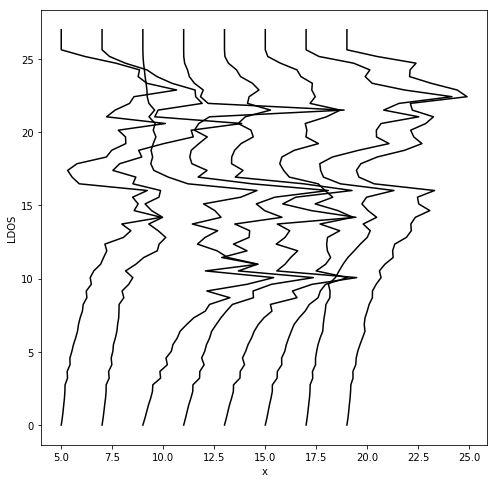

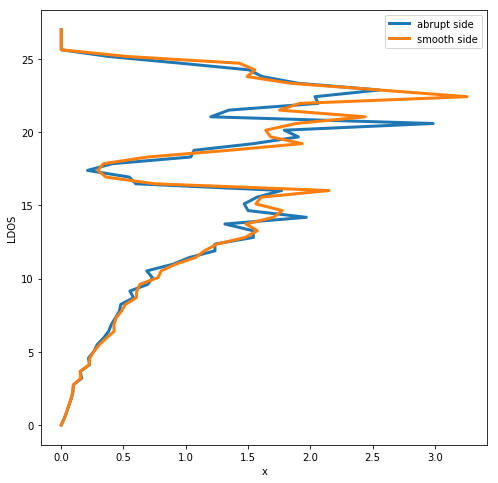

In [73]:
plt.figure(figsize=(8,8))
plotscale = 4
for il in range(len(layer)):
    #plt.fill_between(LDOS[il,:]*plotscale+layer[il],np.sqrt(omega2)*(5/np.pi),np.zeros((len(omega2),)),alpha=0.8,zorder=len(layer)-il,color='r')
    plt.plot(LDOS[il,:]*plotscale+layer[il],np.sqrt(omega2)*(5/np.pi),c='k')
plt.xlabel('x')
plt.ylabel('LDOS')
plt.figure(figsize=(8,8))
plotscale = 0.0
plt.plot(LDOS[0,:]+LDOS[1,:],np.sqrt(omega2)*(5/np.pi),label='abrupt side',lw=3)
#plt.plot(LDOS[1,:],np.sqrt(omega2)*(5/np.pi),label='abrupt side',lw=3,ls='--')
plt.plot(LDOS[-2,:]+LDOS[-1,:],np.sqrt(omega2)*(5/np.pi),label='smooth side',lw=3)
#plt.plot(LDOS[-1,:],np.sqrt(omega2)*(5/np.pi),label='smooth side',lw=3,ls='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('LDOS')

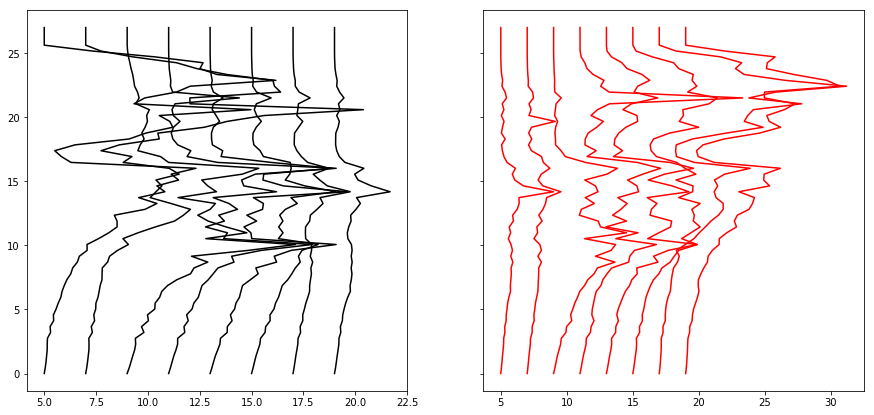

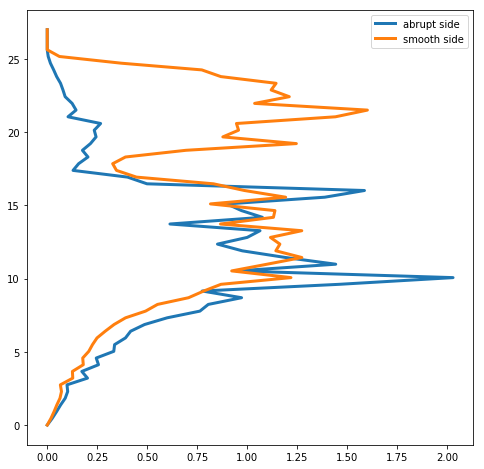

In [86]:
neq1  = D
neq2  =  E

plotscale = 4
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,7))

for il in range(len(layer)):
    #plt.fill_between(LDOS[il,:]*plotscale+layer[il],np.sqrt(omega2)*(5/np.pi),np.zeros((len(omega2),)),alpha=0.8,zorder=len(layer)-il,color='r')
    ax1.plot(neq1[il,:]*plotscale+layer[il],np.sqrt(omega2)*(5/np.pi),c='k')

for il in range(len(layer)):
    ax2.plot(neq2[il,:]*plotscale+layer[il],np.sqrt(omega2)*(5/np.pi),c='r')
plt.figure(figsize=(8,8))
plotscale = 0.0
plt.plot(neq1[2,:],np.sqrt(omega2)*(5/np.pi),label='abrupt side',lw=3)
#plt.plot(LDOS[1,:],np.sqrt(omega2)*(5/np.pi),label='abrupt side',lw=3,ls='--')
plt.plot(neq2[-3,:],np.sqrt(omega2)*(5/np.pi),label='smooth side',lw=3)
plt.legend()

Spectral function
\begin{equation}
A(\omega) = i(G-G^\dagger)
\end{equation}
\begin{equation}
DOS(\omega) = \frac{\omega}{\pi}A(\omega)
\end{equation}
Nonequilibrium density,
\begin{equation}
\delta \rho=\frac{1}{2\pi}\int_{k}\int \frac{\omega}{\pi}A_k n e^{-i\mathbf{k}\cdot\mathbf{R}}
\end{equation}
